<a href="https://colab.research.google.com/github/Saheiyanda/Harmoye-Project/blob/main/Copy_of_Regression_Quiz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
df =pd.read_csv('/content/drive/MyDrive/Appliaces Energy Predicting Data set.csv')
df.head()
df.shape
df.columns


Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
# df.lights
# df.date


In [6]:
pd.set_option("display.max_rows", None)

In [7]:
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,27-05-16 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.7,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,27-05-16 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.6,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,27-05-16 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.5,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,27-05-16 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.3,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784
19734,27-05-16 18:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.2,755.2,57.000000,4.000000,27.000000,13.2,34.118851,34.118851


In [9]:
simple_linear_reg_df = df[["T2","T6"]].sample(15, random_state =42)
simple_linear_reg_df1 = df[["T2","Appliances"]].sample(15, random_state =42)
simple_linear_reg_df2 = df[["T6","Appliances"]].sample(15, random_state =42)

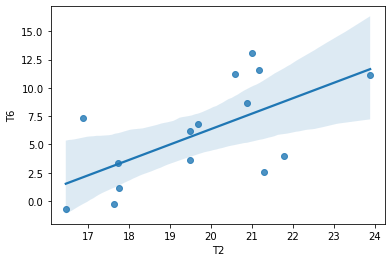

In [10]:
import seaborn as sns

sns.regplot(x="T2", y="T6", data=simple_linear_reg_df)

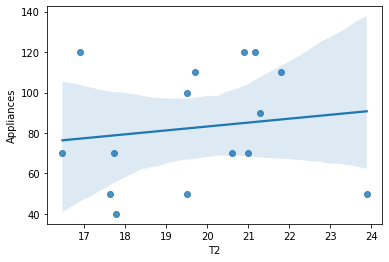

In [11]:
sns.regplot(x="T2", y="Appliances", data=simple_linear_reg_df1)

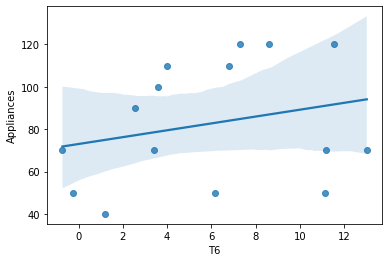

In [12]:
sns.regplot(x="T6", y="Appliances", data=simple_linear_reg_df2)

In [ ]:
# df.lights

In [13]:
df = df.drop(columns=["date","lights"])
# df

In [15]:
# Importing the necessary packages
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
LM = LinearRegression()
scaler   =   MinMaxScaler()  

In [16]:
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
normalised_df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,0.381070,0.841827,0.170594,0.653428,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,0.375443,0.839872,0.170594,0.651064,0.173329,0.660155,0.226500,0.678532,0.369132,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,0.367487,0.830704,0.170594,0.646572,0.173329,0.655586,0.219563,0.676049,0.365595,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,0.363800,0.833401,0.164310,0.641489,0.164175,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,0.361859,0.848264,0.170594,0.639362,0.164175,0.650788,0.219563,0.671909,0.357878,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [17]:
feature_df = normalised_df.drop(columns="Appliances")
feature_df.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,0.381070,0.841827,0.170594,0.653428,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,0.375443,0.839872,0.170594,0.651064,0.173329,0.660155,0.226500,0.678532,0.369132,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,0.367487,0.830704,0.170594,0.646572,0.173329,0.655586,0.219563,0.676049,0.365595,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,0.363800,0.833401,0.164310,0.641489,0.164175,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,0.361859,0.848264,0.170594,0.639362,0.164175,0.650788,0.219563,0.671909,0.357878,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [ ]:
target_var = normalised_df["Appliances"]
target_var
normalised_df.Appliances.head()

0    0.046729
1    0.046729
2    0.037383
3    0.037383
4    0.046729
Name: Appliances, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test,y_train, y_test = tts(feature_df["T2"].values.reshape(-1,1),feature_df["T6"], train_size= 0.7 , random_state=42)

In [ ]:
# k = feature_df['T2'].values.reshape(-1, 1)
# print(k)
# print()
# B = feature_df['T2']
# print(B.head())

In [ ]:
# a = feature_df['T6']
# a.head()

In [19]:
model = LM.fit(x_train, y_train)
model

LinearRegression()

In [24]:
# calculating the coefficient
coef = LM.coef_
coef 

array([0.8910771])

In [25]:
# calculating the intercept
intercept = LM.intercept_
intercept

0.13176427762210746

In [26]:
predict = model.predict(x_test)
predict

array([0.23928945, 0.46794238, 0.23108472, ..., 0.3001772 , 0.4297256 ,
       0.3217686 ])

In [27]:
from sklearn.metrics import r2_score
r_score = r2_score(predict,  y_test)
round(r_score, 3)

0.445

In [28]:
from sklearn.metrics import mean_absolute_error 
MAE = mean_absolute_error(y_test, predict)
round(MAE, 2)

0.08

In [29]:
SS = y_test - predict
RSS = np.sum(np.square(SS))
round(RSS,2)

66.12

In [30]:
from sklearn.metrics import mean_squared_error 
RMSE = np.sqrt(mean_squared_error(y_test, predict))
round(RMSE, 3)

0.106

In [31]:
from sklearn import metrics
coefficent = metrics.r2_score(y_test, predict)
round(coefficent,2)

0.64

In [32]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [33]:
coeff_ = ridge_reg.coef_
coeff_

array([0.8900643])

In [34]:
Predict_ridge = ridge_reg.predict(x_test)
Predict_ridge



array([0.23947944, 0.46787248, 0.23128403, ..., 0.30029798, 0.42969914,
       0.32186484])

In [35]:
# Evaluating the model performance
# Calculating mean absolute error

MAE = mean_absolute_error(y_test, Predict_ridge)
round(MAE, 2)

0.08

In [36]:
# calculating mean square error
mse = np.mean((y_test - Predict_ridge)**2)
round(mse, 3)

0.011

In [37]:
# Calculating R square
from sklearn.metrics import r2_score
r_square = r2_score(Predict_ridge, y_test)
r_square


0.44345696929906053

In [38]:

feat = feature_df.columns
feat

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'],
      dtype='object')

In [40]:
from sklearn.linear_model import Lasso
# training the mode
Lsr = Lasso(alpha=0.001)
Lsr_model = Lsr.fit(x_train, y_train) #Lasso regression model
Lsr_model

Lasso(alpha=0.001)

In [43]:
predict_lsr = Lsr.predict(x_test)
predict_lsr

array([0.24666094, 0.46523011, 0.23881805, ..., 0.3048635 , 0.42869872,
       0.3255027 ])

In [44]:
# Evaluating the model performance
# calculating using mean absolute error
MAE = mean_absolute_error(y_test, predict_lsr)
round(MAE, 2)


0.08

In [45]:
mse = np.mean((predict_lsr - y_test)**2)
round(mse, 3)

0.011

In [46]:
# Calculating R square
from sklearn.metrics import r2_score
lrscore = r2_score(y_test,predict_lsr)
lrscore


0.641549502530036

In [47]:
from sklearn.model_selection import train_test_split as tts
X = normalised_df.drop(columns=['Appliances'])
Y = normalised_df['Appliances']

x_train, x_test, y_train, y_test = tts(X, Y, test_size=0.3, random_state=42)
LM1 = LinearRegression()
LM1.fit(x_train, y_train)

LinearRegression()

In [48]:
predictions = LM1.predict(x_test)
predictions

array([0.03319482, 0.24412217, 0.0340092 , ..., 0.06843864, 0.09999407,
       0.05760656])

In [52]:
Rr = Ridge(alpha=0.01)
Rr1 = Rr.fit(x_train,y_train ) #Training the model with ridge regression
Rr1

Ridge(alpha=0.01)

In [53]:
predict_rr = Rr.predict(x_test) # predicting the estimate 
predict_rr

array([0.0331943 , 0.24402526, 0.03402424, ..., 0.06844336, 0.09999279,
       0.05763869])

In [54]:
#Checking the model performance
# calculating mean absolute error
MAE_rr = mean_absolute_error(y_test, predict_rr)
round(MAE_rr, 2)


0.05

In [55]:
# Checking mean square error
mse_rr = np.mean((predict_rr - y_test)**2)
round(mse_rr, 3)

0.008

In [58]:
# Checking the r-square
R2_rr = r2_score(y_test, predict_rr)
R2_rr


0.14888293373652206

In [60]:
# Training the data using Lasso Regression
Lsr1 = Lasso(alpha = 0.01)
M_Lsr1 = Lsr1.fit(x_train, y_train)
M_Lsr1

Lasso(alpha=0.01)

In [61]:
#Predicts the values of y
predict_lsr1 = M_Lsr1.predict(x_test)
predict_lsr1


array([0.08198847, 0.08198847, 0.08198847, ..., 0.08198847, 0.08198847,
       0.08198847])

In [63]:
#Evaluating the model performance
#Calculating the mean square absolute error
MAE_lsr = mean_absolute_error(y_test, predict_lsr1)
round(MAE_lsr, 2)



0.06

In [64]:
# Checking mean square error
mse_lsr = np.mean((predict_lsr1 - y_test)**2) #formular for calculating mean square erro
round(mse_lsr, 3)

0.009

In [65]:
# Checking the r-square
R2_lsr = r2_score(y_test, predict_lsr1)
R2_lsr


-1.1536689688007584e-06

In [76]:
# def get_weights_df(model, feat, col_name):
#     weights = pd.Series(model.coef_, feat.columns).sort_values()
#     weights_df = pd.DataFrame(weights).reset_index()
#     weights_df.columns = ["Features", col_name]
#     weights_df[col_name].round(3)
#     return weights_df

In [70]:
# linear_model_weights = get_weights_df(LM1, x_train, 'Linear_Model_Weight')
# linear_model_weights.sort_values(by='Linear_Model_Weight', ascending=True)


,Features,Linear_Model_Weight
0,RH_2,-0.456662
1,T_out,-0.321969
2,T2,-0.236198
3,T9,-0.189977
4,RH_8,-0.157585
5,RH_out,-0.077748
6,RH_7,-0.044620
7,RH_9,-0.039808
8,T5,-0.015645
9,T1,-0.003242


In [79]:
def get_weights_df(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ["Features", col_name]
    weights_df[col_name].round(3)
    return weights_df

In [82]:
linear_model_weights = get_weights_df(LM1, x_train, 'Linear_Model_Weight')
Ridge_weights_df = get_weights_df(Rr, x_train, 'Ridge_Model_weight')
Lasso_weights_df = get_weights_df(Lsr1, x_train, 'Lasso_Model_weight')

Final_weights = pd.merge(linear_model_weights,Ridge_weights_df, on ='Features')
Final_weights = pd.merge(Final_weights, Lasso_weights_df, on ='Features')
Final_weights


,Features,Linear_Model_Weight,Ridge_Model_weight,Lasso_Model_weight
0,RH_2,-0.456662,-0.455388,-0.0
1,T_out,-0.321969,-0.320122,0.0
2,T2,-0.236198,-0.235221,0.0
3,T9,-0.189977,-0.189958,0.0
4,RH_8,-0.157585,-0.157571,-0.0
5,RH_out,-0.077748,-0.077016,-0.0
6,RH_7,-0.044620,-0.044656,-0.0
7,RH_9,-0.039808,-0.039853,-0.0
8,T5,-0.015645,-0.015767,0.0
9,T1,-0.003242,-0.003679,0.0
